In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from matplotlib import colormaps
from scipy import stats


# Ignore warnings for all of the future plots
import warnings
warnings.filterwarnings('ignore')

**IMAGES CREDIT:** MLB.com, ESPN.com (player headshots)

**DATA SOURCES:** Baseball Savant, FanGraphs 

# Problem B: Pitch Deception

"Define pitcher “deception” and use publicly available data to create a leaderboard of the most deceptive
MLB pitchers according to your definition."

## Introduction: Defining Pitch 'Deception' - Two Core Areas

'Deception' is a relatively new concept in the public research space, lacking a clear definition. This has caused the true definition of deception to be somewhat skewed, especially within the public research space. The focus of my analysis will be to determine this actual definition of deception, evaluating players based on this.

In a literal sense, deception is the act of fooling or tricking someone into believing something that is not true. From a pitching perspective, I define this as: **the act of fooling a hitter into believing a pitch will do one thing, but then it does something different or unexpected**. This can be broken down into two aspects:

* **Body Deception**: I define this as a pitcher's ability to hide the ball from a hitter for as long as possible, giving them less time to view to perceive the pitch at release. Driveline baseball has been able to measure this through occlusion score, a metric which I unfortunately do not have access to. This somewhat makes it a mute point to evaluate this aspect of deception, but there is one thing I may want to explore. Specifically, I'm interested in how **height plays a role in deception**. For example, there may be taller pitchers that throw from an average to below average release point (i.e., Paul Skenes). Given that Driveline baseball has research to prove that hitters may focus on a pitcher's head/torso when attempting to perceive a pitch, could a taller pitcher with an average to below average release point be creating deception? They are delivering at a point that might throw a batter off, so is it deception? This is something that I may want to explore later on. Regardless, I won't be as focused on body deception in this analysis due to the **lack of available biomechanics data**.


* **Pitch Deception**: This aspect is purely focused on how the pitch acts. I define it as how much a **pitch's movement deviates from the an average pitch of the same release point & arm angle**. This type of deviation may implicate that the pitcher is creating a "unique impression" on the ball at release, leading to the additional movement as compared to the average pitch of this same shape. Effectively, the pitch is deceiving the hitter as it ends up in a different location (due to the additional movement) despite an identical pitch shape to the average. **This will be the focus of my analysis.**

## Problem Overview, Purpose of Analysis & Data Understanding

**Problem Overview & Purpose of Analysis:** In this analysis, I will attempt to evaluate MLB pitchers based on their pitch deceptiveness. Specifically, I will evaluate league pitchers on the **deceptiveness of their four-seam fastballs**. Recall that I have defined deception as: **a pitch's ability to create additional movement than a pitch that is delivered from a similar arm slot & release point, effectively fooling a hitter as it significantly deviates from the 'expected result'**. To accomplish this, I will leverage pitch data from 2024 (see 'dataset overview below') & group pitchers (LHP & RHP seperately) based on their similarity in arm angle and four-seam fastball shape. I will then identify the average 4-seam movememnt within each group, classifying it as the "expected result" for this respective group. Deception will then be calculated by measuring how much a pitcher's 4-seamer deviates from this result.

Through my analysis, I hope to accomplish the following:

* **Goal 1**: *Accurately define & measure pitch deception (4-Seam Fastballs)*
* **Goal 2**: *Identify the pitchers who had the most 'deceptive' 4-seam fastball in 2024*
* **Goal 3**: *Attempt to measure how much pitch deception (4-Seam Fastballs) correlates with actual performance*

**Dataset Overview:** To support my analysis, I will leverage Four Seam Fastball pitch data from 2024 (Source: Baseball Savant). This dataset includes the aggregated results for pitchers in MLB who **threw at least 400 4-seamers** (to provide a solid sample size that still has enough pitch-data to provide informed aggregated results. 202 pitchers total), providing their respective  pitch attributes (speed, spin), and performance data (whiff rate, xBA, K%...) on 4-seamers. In order to retrieve pitch release points & movement figures, I'll need to rely on pybaseball & import it (unfortunately, savant does not allow you to download an aggregated version of release pt or movement through a csv file on 'Statcast search')

I will also leverage arm angle data for MLB pitchers (source: Baseball Savant). This will help me profile & group the pitchers in my analysis (see next section)

In [95]:
# Load in pitch & arm angle data
ff = pd.read_csv('../data/4-seam 2024.csv')
arm = pd.read_csv('../data/Pitcher Arm Angles.csv')

Before I proceed with the analysis, let's quickly put together all of the data. I'll need to use Pybaseball because baseball savant's website limits what metrics & how much data can be downloaded in a .csv file.

In [98]:
!pip install pybaseball

In [105]:
from pybaseball import statcast_pitcher

# Extract 2024 season data, filter for 4-seam fastball data
data = statcast('2024-01-28', '2024-10-01')
four_seam_data = data[data['pitch_type'] == 'FF']
                      
# Select release points, movement data
baseball_columns = ['release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'release_speed', 'pitcher', 'player_name']
four_seam_data = four_seam_data[baseball_columns]


# Extract the player_ids  
player_ids = ff['player_id'].unique()
player_ids_list = player_ids.tolist()

# Initialize an empty list to store each player's data
all_players_data = []

# Retrieve the data for each player_id
for player_id in player_ids_list:
    
    # Retrieve data for the 2024 season for the specific player, filter for four seam data
    player_data = statcast_pitcher('2024-01-28', '2024-10-01', player_id=player_id)
    four_seam_data = player_data[player_data['pitch_type'] == 'FF']
    # Select release points, pitch movement
    baseball_columns = ['release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'release_speed', 'pitcher', 'player_name']
    four_seam_data = four_seam_data[baseball_columns]
    
    # Append to the list
    all_players_data.append(four_seam_data)

# Concatenate all data into a single DataFrame
all_data = pd.concat(all_players_data, ignore_index=True)

# Aggregate data by pitcher
agg = all_data.groupby(['pitcher', 'player_name']).mean().reset_index()

This is a large query, it may take a moment to complete
Skipping offseason dates


100%|█████████████████████████████████| 201/201 [01:24<00:00,  2.37it/s]


Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering Player Data
Gathering 

In [109]:
# Rename 'pitcher' to 'player_id' for simplicity
agg = agg.rename(columns={'pitcher': 'player_id'})

# Merge on 'player_id' to include all columns from ff
final_ff = ff.merge(agg, on='player_id', how='left')

In [117]:
# Rename 'pitcher' to 'player_id' for simplicity
arm = arm.rename(columns={'pitcher': 'player_id'})

# Select specific columns from arm
arm_sel = arm[['player_id', 'pitch_hand', 'ball_angle', 'relative_release_ball_x', 'release_ball_z', 'relative_shoulder_x', 'shoulder_z']]

# Merge final_ff with columns rom arm
pitch_data = final_ff.merge(arm_sel, on='player_id', how='left')

pitch_data

,pitches,player_id,player_name_x,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,release_pos_z,pfx_x,pfx_z,release_speed,pitch_hand,ball_angle,relative_release_ball_x,release_ball_z,relative_shoulder_x,shoulder_z
0,1657,669022,"Gore, MacKenzie",1657,100,0.281,0.137,0.340,0.418,0.346,...,5.847904,0.492240,1.465096,95.999940,L,47,1.552750,5.850775,0.026104,4.203439
1,1652,642547,"Peralta, Freddy",1652,100,0.239,0.184,0.293,0.424,0.331,...,5.366074,-0.561540,1.388011,94.357351,R,37,-2.171440,5.278746,-0.387693,3.939144
2,1531,607074,"Rodón, Carlos",1531,100,0.262,0.252,0.263,0.514,0.364,...,6.399983,0.726188,1.477010,95.292816,L,45,1.689815,6.332324,-0.021144,4.594593
3,1513,592332,"Gausman, Kevin",1513,100,0.277,0.190,0.306,0.466,0.346,...,5.733125,-0.900994,1.411748,93.965692,R,36,-2.077908,5.678880,-0.142277,4.264454
4,1416,668881,"Greene, Hunter",1416,100,0.184,0.089,0.255,0.273,0.262,...,6.025975,-0.740550,1.379248,97.596866,R,32,-2.274182,5.971107,-0.317083,4.750401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,404,458677,"Wilson, Justin",404,100,0.333,0.309,0.435,0.642,0.435,...,6.403515,0.550050,1.468267,95.488861,L,48,1.363301,6.367899,-0.190436,4.614777
198,404,672710,"Contreras, Roansy",404,100,0.231,0.115,0.275,0.346,0.287,...,5.942214,-0.418542,1.451863,94.697601,R,49,-1.125997,5.932481,0.373273,4.234691
199,402,656641,"Latz, Jacob",402,100,0.228,0.152,0.263,0.380,0.340,...,5.975401,0.474745,1.543552,94.929684,L,51,1.164574,5.936047,-0.273328,4.187472
200,402,665871,"Assad, Javier",402,100,0.319,0.153,0.412,0.472,0.374,...,5.992189,-0.469652,1.377512,91.494776,R,55,-1.046603,6.000084,0.222974,4.200828


## Profiling Pitchers Based On Handedness, Arm Angle, 4-Seam Pitch Shape

Before we begin any pitcher profiling, let's first visualize the various arm angles for RHP and LHP splits.

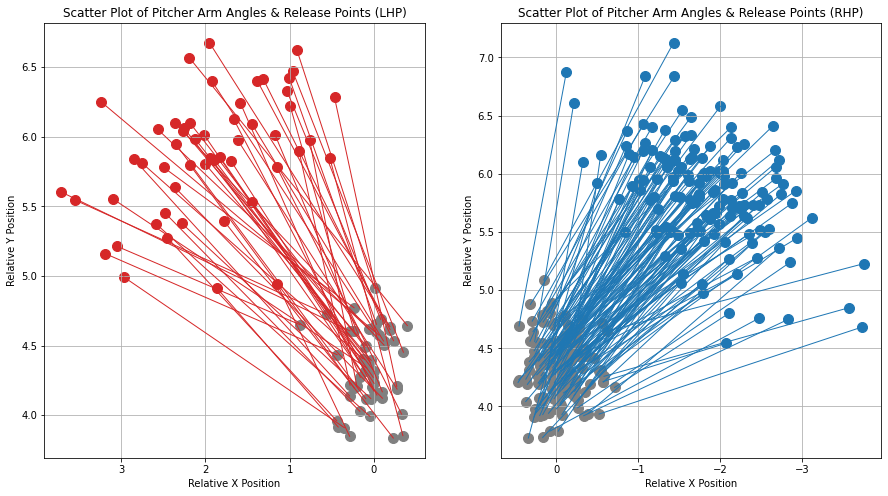

In [153]:
# Create Base for Subplots
fig, ax = plt.subplots(figsize = (15, 8))

# Add Axes and Individual Grids - Subplot Grids
ax1 = plt.subplot2grid(shape=(1,2), loc=(0,0))
ax2 = plt.subplot2grid(shape=(1,2), loc=(0,1))

# Create scatter plot - LHP
left = pitch_data[pitch_data['pitch_hand'] == 'L']
ax1.scatter(left['release_pos_x'], left['release_pos_z'], color = 'tab:red', s=100) # Plot release point
ax1.scatter(left['relative_shoulder_x'], left['shoulder_z'], color = 'grey', s=100) # Plot shoulder point
ax1.set_xlabel('Relative X Position')
ax1.set_ylabel('Relative Y Position')
ax1.set_title('Scatter Plot of Pitcher Arm Angles & Release Points (LHP)')
ax1.invert_xaxis() # Flip x-axis
ax1.grid(True)
# Draw lines for LHP based on shoulder and release points
for _, row in left.iterrows():
    ax1.plot([row['relative_shoulder_x'], row['release_pos_x']],
             [row['shoulder_z'], row['release_pos_z']],
             color='tab:red', linestyle='-', linewidth=1)


# Create scatter plot - RHP
right = pitch_data[pitch_data['pitch_hand'] == 'R']
ax2.scatter(right['release_pos_x'], right['release_pos_z'], color = 'tab:blue', s=100) # Plot release point
ax2.scatter(right['relative_shoulder_x'], right['shoulder_z'], color = 'grey', s=100) # Plot shoulder point
ax2.set_xlabel('Relative X Position')
ax2.set_ylabel('Relative Y Position')
ax2.set_title('Scatter Plot of Pitcher Arm Angles & Release Points (RHP)')
ax2.invert_xaxis() # Flip x-axis
ax2.grid(True)
# Draw lines for RHP based on shoulder and release points
for _, row in right.iterrows():
    ax2.plot([row['relative_shoulder_x'], row['release_pos_x']],
             [row['shoulder_z'], row['release_pos_z']],
             color='tab:blue', linestyle='-', linewidth=1)

Consider this as the **starting point** for our analysis. We'll take a look back at it after we've classified the pitchers. 

**Clustering Approach**

To classify hitters, I'll rely on the **arm angle and release point (their arm slot, effectively)**, clustering pitchers into **3 different groups** (for both RHP and LHP):
1. Low
2. Medium
3. High

I chose not too focus on velocity or spin because I view these as **potential products of deception**. 

To help simplify the process, I'll use **composite scoree & quantile binning**

In [280]:
from sklearn.preprocessing import StandardScaler

# Initialize Scaler
scaler = StandardScaler()

# Cluster RHP
# Standardize each feature
right[['ball_angle_std', 'release_pos_x_std', 'release_pos_z_std']] = scaler.fit_transform(
    right[['ball_angle', 'release_pos_x', 'release_pos_z']]
)
# Calculate composite score 
right['composite_score'] = right['ball_angle_std'] + right['release_pos_x_std'] + right['release_pos_z_std']
# Apply quantile binning
right['cluster'] = pd.qcut(right['composite_score'], q=3, labels=['Low', 'Medium', 'High'])

# Cluster LHP
# Standardize each feature
left[['ball_angle_std', 'release_pos_x_std', 'release_pos_z_std']] = scaler.fit_transform(
    left[['ball_angle', 'release_pos_x', 'release_pos_z']]
)
# Calculate composite score 
left['composite_score'] = left['ball_angle_std'] + left['release_pos_x_std'] + left['release_pos_z_std']
# Apply quantile binning
left['cluster'] = pd.qcut(left['composite_score'], q=3, labels=['Low', 'Medium', 'High'])




**Breaking Down Each Cluster Group:**

Before we calculate deviation, its important that we understand the dynamics of each created cluster. I'll quantify the number of hitters per cluster, visualize their relese points & arm angles, and calculate the average metrics per cluster. See the results below:

![Cluster Table](images/Cluster%20Table.png)

Let's re-visit our plot from earlier to visualize these clusters

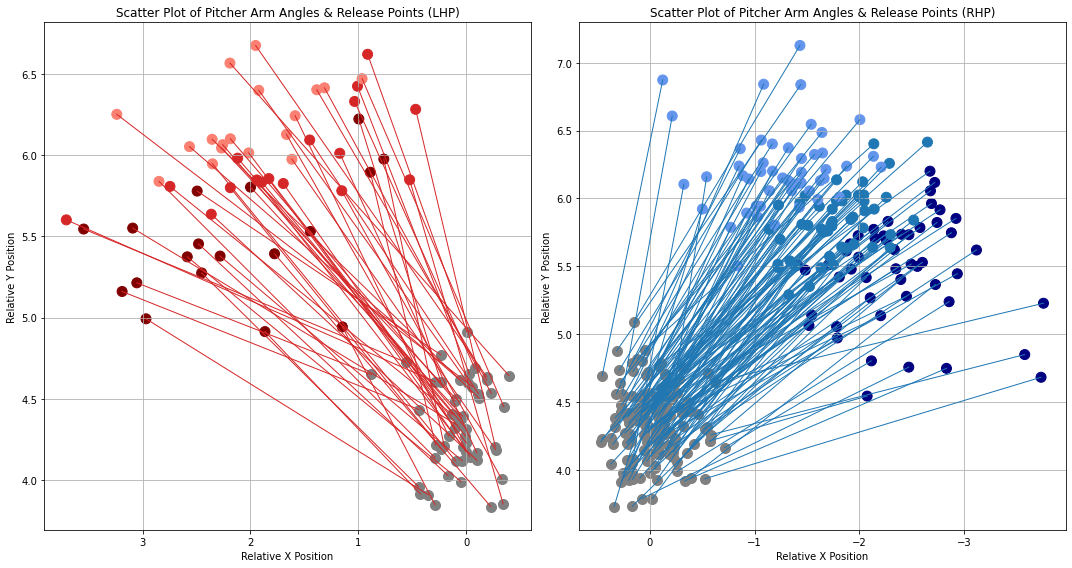

In [285]:
# Create Base for Subplots
fig, ax = plt.subplots(figsize=(15, 8))

# Add Axes and Individual Grids - Subplot Grids
ax1 = plt.subplot2grid(shape=(1, 2), loc=(0, 0))
ax2 = plt.subplot2grid(shape=(1, 2), loc=(0, 1))

# Define color maps for clusters (LHP & RHP)
color_map1 = {'Low': 'navy', 'Medium': 'tab:blue', 'High': 'cornflowerblue'}
color_map2 = {'Low': 'maroon', 'Medium': 'tab:red', 'High': 'salmon'}
# Map colors for release points only based on clusters
releaselhp = left['cluster'].map(color_map2)  # LHP color mapping by cluster
releaserhp = right['cluster'].map(color_map1)  # RHP color mapping by cluster

# Create scatter plot - LHP
ax1.scatter(left['release_pos_x'], left['release_pos_z'], color= releaselhp, s=100)  # Plot release point
ax1.scatter(left['relative_shoulder_x'], left['shoulder_z'], color='grey', s=100)  # Plot shoulder point
ax1.set_xlabel('Relative X Position')
ax1.set_ylabel('Relative Y Position')
ax1.set_title('Scatter Plot of Pitcher Arm Angles & Release Points (LHP)')
ax1.invert_xaxis()  # Flip x-axis
ax1.grid(True)

# Draw lines for LHP based on shoulder and release points
for _, row in left.iterrows():
    line_color = color_map2.get(row['cluster'], 'tab:red')
    ax1.plot([row['relative_shoulder_x'], row['release_pos_x']],
             [row['shoulder_z'], row['release_pos_z']],
             color='tab:red', linestyle='-', linewidth=1)

# Create scatter plot - RHP
ax2.scatter(right['release_pos_x'], right['release_pos_z'], color= releaserhp, s=100)  # Plot release point
ax2.scatter(right['relative_shoulder_x'], right['shoulder_z'], color='grey', s=100)  # Plot shoulder point
ax2.set_xlabel('Relative X Position')
ax2.set_ylabel('Relative Y Position')
ax2.set_title('Scatter Plot of Pitcher Arm Angles & Release Points (RHP)')
ax2.invert_xaxis()  # Flip x-axis
ax2.grid(True)

# Draw lines for RHP based on shoulder and release points
for _, row in right.iterrows():
    line_color = color_map1.get(row['cluster'], 'tab:blue')
    ax2.plot([row['relative_shoulder_x'], row['release_pos_x']],
             [row['shoulder_z'], row['release_pos_z']],
             color='tab:blue', linestyle='-', linewidth=1)
    

plt.tight_layout()
plt.show()


With my clusters constructed, I can begin my calculation of FF pitch deception.

## Calculating Pitch Deception

As mentioned earlier, pitch deception will be measured as: "how much a four-seamer deviates from the expected movement of a four-seamer thrown in a similar arm slot & release point (the same cluster, in this case)". 

Within this section, I'll first calculate the average FF movement per cluster (horizontal and vertical), and then calculate deception by subtracting the pitcher's actual FF movement (vertical & horizontal) from this average)

In [287]:
# Calculate the average movement per cluster, merge it  to the dataset

# RHP
averages1 = right.groupby('cluster')[['pfx_x', 'pfx_z']].mean()
# Merge average into dataframe
right = right.merge(averages1, on='cluster', how='left')

# LHP
averages2 = left.groupby('cluster')[['pfx_x', 'pfx_z']].mean()
# Merge average into dataframe
left = left.merge(averages2, on='cluster', how='left')

In [292]:
# Calculate deception - how much additional movement a pitcher creates from the average

# RHP
right['deception_x'] = abs(right['pfx_x_x'] - right['pfx_x_y'])
right['deception_z'] = abs(right['pfx_z_x'] - right['pfx_z_y'])
# Combine into total deception
right['total_deception'] = right['deception_x'] + right['deception_z']

# LHP
left['deception_x'] = abs(left['pfx_x_x'] - left['pfx_x_y'])
left['deception_z'] = abs(left['pfx_z_x'] - left['pfx_z_y'])
# Combine into total deception
left['total_deception'] = left['deception_x'] + left['deception_z']



Now that I've calculated 'total_deception' (Four Seam Fastballs), let's analyze the results 

## The Results: 4-Seam Deception Leaderboard, Thoughts & Analysis

Let's begin by taking a look at the top 10 most deceptive pitchers for LHP & RHP pitchers, and from an overall standpoint.

In [301]:
# Identify Top Pit
top10_right = right.sort_values(by='total_deception', ascending=False).head(10)
top10_left = left.sort_values(by='total_deception', ascending=False).head(10)

# Select columns (player name, deception, cluster group)
top10_right = top10_right[['player_name_x', 'deception_x', 'deception_z',  'total_deception', 'cluster']]
top10_left = top10_left[['player_name_x', 'total_deception', 'deception_x', 'deception_z', 'cluster']]

# Rename columns
top10_right = top10_right.rename(columns={'player_name_x': 'Player Name', 'total_deception': 'Deception Score'})
top10_left = top10_left.rename(columns={'player_name_x': 'Player Name', 'total_deception': 'Deception Score'})

![top10RHP](images/top10RHP.png)

![top10LHP](images/top10LHP.png)

![Top3](images/Top3.png)

We can further visualize this by analyzing their pitch movement matrices:

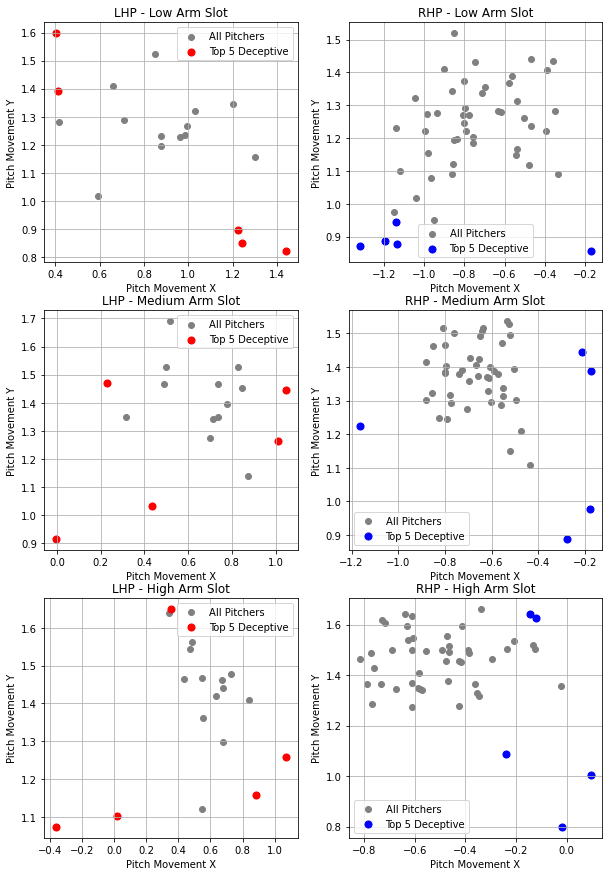

In [318]:
# Create base for subplot grid
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Separate data by cluster 

# LHP
left_low = left[left['cluster'] == 'Low']
left_medium = left[left['cluster'] == 'Medium']
left_high = left[left['cluster'] == 'High']
# RHP
right_low = right[right['cluster'] == 'Low']
right_medium = right[right['cluster'] == 'Medium']
right_high = right[right['cluster'] == 'High']

# Top 10 in total_deception for each cluster and hand
left_low_top5 = left_low.nlargest(5, 'total_deception')
left_medium_top5 = left_medium.nlargest(5, 'total_deception')
left_high_top5 = left_high.nlargest(5, 'total_deception')

right_low_top5 = right_low.nlargest(5, 'total_deception')
right_medium_top5 = right_medium.nlargest(5, 'total_deception')
right_high_top5 = right_high.nlargest(5, 'total_deception')

# Plot for LHP - Low 
ax = axes[0, 0]
ax.scatter(left_low['pfx_x_x'], left_low['pfx_z_x'], color='gray', label='All Pitchers')
ax.scatter(left_low_top5['pfx_x_x'], left_low_top5['pfx_z_x'], color='red', s=50, label='Top 5 Deceptive')
ax.set_title("LHP - Low Arm Slot")
ax.set_xlabel("Pitch Movement X")
ax.set_ylabel("Pitch Movement Y")
ax.grid(True)
ax.legend()

# Plot for LHP - Medium
ax = axes[1, 0]
ax.scatter(left_medium['pfx_x_x'], left_medium['pfx_z_x'], color='gray', label='All Pitchers')
ax.scatter(left_medium_top5['pfx_x_x'], left_medium_top5['pfx_z_x'], color='red', s=50, label='Top 5 Deceptive')
ax.set_title("LHP - Medium Arm Slot")
ax.set_xlabel("Pitch Movement X")
ax.set_ylabel("Pitch Movement Y")
ax.grid(True)
ax.legend()

# Plot for LHP - High 
ax = axes[2, 0]
ax.scatter(left_high['pfx_x_x'], left_high['pfx_z_x'], color='gray', label='All Pitchers')
ax.scatter(left_high_top5['pfx_x_x'], left_high_top5['pfx_z_x'], color='red', s=50, label='Top 5 Deceptive')
ax.set_title("LHP - High Arm Slot")
ax.set_xlabel("Pitch Movement X")
ax.set_ylabel("Pitch Movement Y")
ax.grid(True)
ax.legend()

# Plot for RHP - Low 
ax = axes[0, 1]
ax.scatter(right_low['pfx_x_x'], right_low['pfx_z_x'], color='gray', label='All Pitchers')
ax.scatter(right_low_top5['pfx_x_x'], right_low_top5['pfx_z_x'], color='blue', s=50, label='Top 5 Deceptive')
ax.set_title("RHP - Low Arm Slot")
ax.set_xlabel("Pitch Movement X")
ax.set_ylabel("Pitch Movement Y")
ax.grid(True)
ax.legend()

# Plot for RHP - Medium
ax = axes[1, 1]
ax.scatter(right_medium['pfx_x_x'], right_medium['pfx_z_x'], color='gray', label='All Pitchers')
ax.scatter(right_medium_top5['pfx_x_x'], right_medium_top5['pfx_z_x'], color='blue', s=50, label='Top 5 Deceptive')
ax.set_title("RHP - Medium Arm Slot")
ax.set_xlabel("Pitch Movement X")
ax.set_ylabel("Pitch Movement Y")
ax.grid(True)
ax.legend()

# Plot for RHP - High 
ax = axes[2, 1]
ax.scatter(right_high['pfx_x_x'], right_high['pfx_z_x'], color='gray', label='All Pitchers')
ax.scatter(right_high_top5['pfx_x_x'], right_high_top5['pfx_z_x'], color='blue', s=50, label='Top 5 Deceptive')
ax.set_title("RHP - High Arm Slot")
ax.set_xlabel("Pitch Movement X")
ax.set_ylabel("Pitch Movement Y")
ax.grid(True)
ax.legend()

plt.show()


**ATTEMPTING TO IDENTIFY THE CORRELATION BETWEEN PITCH DECEPTION & PITCH PERFORMANCE**

As identified in one of my goals, I wanted to analyze the performance implications of this potential deception. We can do this through 2 different methods:
1. Analyzing the correlation of 4-seam deception metrics to pitch performance metrics (whiff %, hard-hit%)
2. Analyzing the performance metrics of the 'most deceptive' pitchers vs. the field

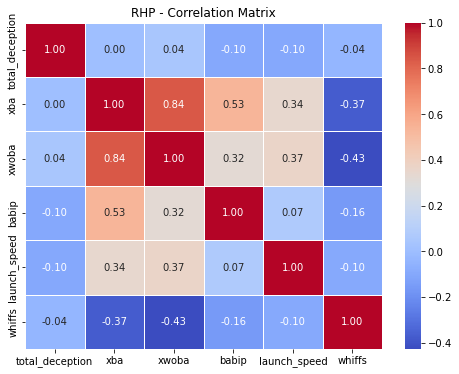

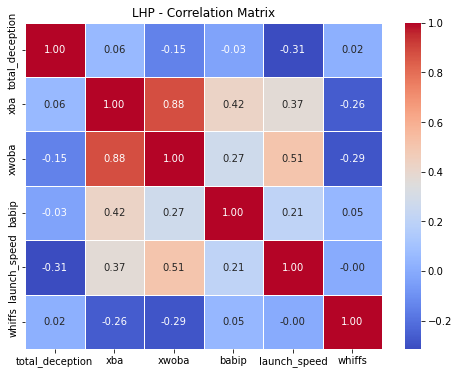

In [319]:
# Build correlation matrix - total_deception and performance metrics (RHP)
plt.figure(figsize=(8, 6))
correlation_matrix = right[['total_deception', 'xba', 'xwoba', 'babip', 'launch_speed', 'whiffs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("RHP - Correlation Matrix")
plt.show()
# Build correlation matrix - total_deception and performance metrics (LHP)
plt.figure(figsize=(8, 6))
correlation_matrix2 = left[['total_deception', 'xba', 'xwoba', 'babip', 'launch_speed', 'whiffs']].corr()
sns.heatmap(correlation_matrix2, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("LHP - Correlation Matrix")
plt.show()

Overall, **there are weak correlations between total_deception and 4-seam pitch performance metrics**. This suggests that four-seam deception may not necessarily have any bearing on pitch performance (in terms of my definition, at least). 

## Summary & Conclusion

Through my analysis, I was able to identify the top 10 pitchers (overall, LHP, and RHP) in 4-seam pitch deception (see above for results). With these results available, let's revisit the goals I set previously:

* **Goal 1**: *Accurately define & measure pitch deception (4-Seam Fastballs)*
    * I defined pitch deception as: **how much extra movement a pitcher is able to create in comparison to other pitches thrown from a similar release point & arm slot (effectively deviating from the 'expected' result)**. 
    * I successfully calculated 4-seam 'deception' for all of the pitchers in the dataset
    
    
* **Goal 2**: *Identify the pitchers who had the most 'deceptive' 4-seam fastball in 2024*
    * *Please see the top 10 lists above*


* **Goal 3**: *Attempt to measure how much pitch deception (4-Seam Fastballs) correlates with actual performance*
    * Based on my analysis, there is **minimal correlation** between my definition of pitch deception & actual performance. This likely implicates the importance of other features beyond deception (i.e., location, demand, velocity, potentially body deception?).



# Problem C: Steven Kwan's Probability of a 20-game Hit Streak

"Select any Major League hitter and determine the probability that they have at least one streak of 20 or
more games with a hit in the coming season using advanced statistical techniques such as Bayesian
Analysis, Monte Carlo Simulation, etc."

## Metholdogy: Problem Overview, Purpose of Analysis, & Dataset Overview

**Problem Overview & Purpose of Analysis:** In the following analysis, I will leverage advanced analytical methods (bayesian analysis, monte-carlo simulation) to calculate Steven Kwan's probability of reaching a 20-game hits streak in 2025. To achieve this, I will leverage Kwan's historical performance metrics (see 'dataset overview' below), analyzing the hit streaks he accomplished across his career. Through this analysis, I hope to accomplish the following:
* **Goal 1**: *Calculate a reasonable estimate for Kwan's probabiltiy of achieving a 20-game hit streak in 2025. The estimate should be founded based on Kwan's historical performances.*
* **Goal 2**: *Measure Kwan's likelihood of a 20-game hit streak against the rest of the field (to some degree, at least). How does Kwan measure up? Is there a managerial insight we can derive?*
* **Goal 3**: *Is there any sort of managerial or player evaluation insight we can derive from this analysis?*

**Dataset Overview:** To support my analysis, I will leverage Kwan's pitch-level performance data from 2022 - 2024 (Source: Baseball Savant, 'Statcast search function'). The dataset includes every single pitch Kwan has faced from 2022 - 2024, recording any results as they occur (i.e., hits, outs recorded, etc.). I decided to use **2022 through 2024 data** to provide for a larger sample size, attempting to avoid any anomalies that might've occured during a single season. Overall, this provides for a more **balanced analysis that will return a stable estimate**. 

In [2]:
# Load in Stevek Kwan's 2022 - 2024 pitch-level data
kwan2022 = pd.read_csv('../data/Kwan_2022.csv')
kwan2023 = pd.read_csv('../data/Kwan_2023.csv')
kwan2024 = pd.read_csv('../data/Kwan_2024.csv')

## Problem Understanding: How Often Do 20-Game Hit Streaks Occur In The MLB?
    
To fully contextualize Kwan's likelihood of a 20-game hit streak, we first need to understand the likelihood of it occuring for any given player. The charts below reveal how common 20-game hit streaks were in the MLB in 2023 & 2024:

![MLB Hit Streak](images/MLB%20Hit%20Streak%20Leaders.png)

As the chart shows, only **3 MLB Hitters** achieved a 20-game hitting streak in 2023 or 2024. Given that there were 134 qualified hitters in 2023 and 129 qualified hitters in 2024 (Source: MLB.com), this means that only **~2.40% of qualified hitters actually end up achieving a 20-game hit streak in a season**.

While this allows us to gauge the rarity of such a feat, it doesn't consider for **Kwan's personal performance**. Regardless, the number provides us with a 'reasonable expectation' as to what the calculated result should be (i.e., probability should be **within the 0-5% range**, most likely)

## Data Exploration: Calculating Kwan's Historical Hit Streaks

To gauge Kwan's probability of achieving a 20-game hit streak, let's explore his historical performances:

**2022 Season (638 PA | Max Hit Streak: 18 | Mean Hit Streak: 2.92 | Probability of Getting A Hit (Per Game): 71.43% )**

In [3]:
# Identify whether or not Kwan recorded a hit
hits = ["single", "double", "triple", "home_run"]
kwan2022['hit'] = kwan2022['events'].isin(hits).astype(int)

# Group by game_pk and game_date, identify Kwan's hits per game
games_with_hits22 = kwan2022.groupby(['game_pk', 'game_date'])['hit'].max().reset_index()
games_with_hits22['game_date'] = pd.to_datetime(games_with_hits22['game_date']) # Convert game_date into a date/time format
games_with_hits22 = games_with_hits22.sort_values(by='game_date').reset_index(drop=True)
games_with_hits22.head()


,game_pk,game_date,hit
0,662766,2022-04-07,1
1,662765,2022-04-09,1
2,662755,2022-04-10,1
3,662754,2022-04-11,1
4,663088,2022-04-12,1


In [4]:
# Initialize lists to hold streak lengths for visualization
streaks = []
current_streak = 0

# Calculate streaks and add them to the list for each game date
for hit in games_with_hits22['hit']:
    if hit == 1:
        current_streak += 1
    else:
        current_streak = 0
        
    streaks.append(current_streak)

# Add the streaks to 'game_with_hits' dataset
games_with_hits22['streak_length'] = streaks

# Calculate the mean & max streak length for visualization
mean_streak_length = np.mean(games_with_hits22['streak_length'])
max_streak_length = np.max(games_with_hits22['streak_length'])

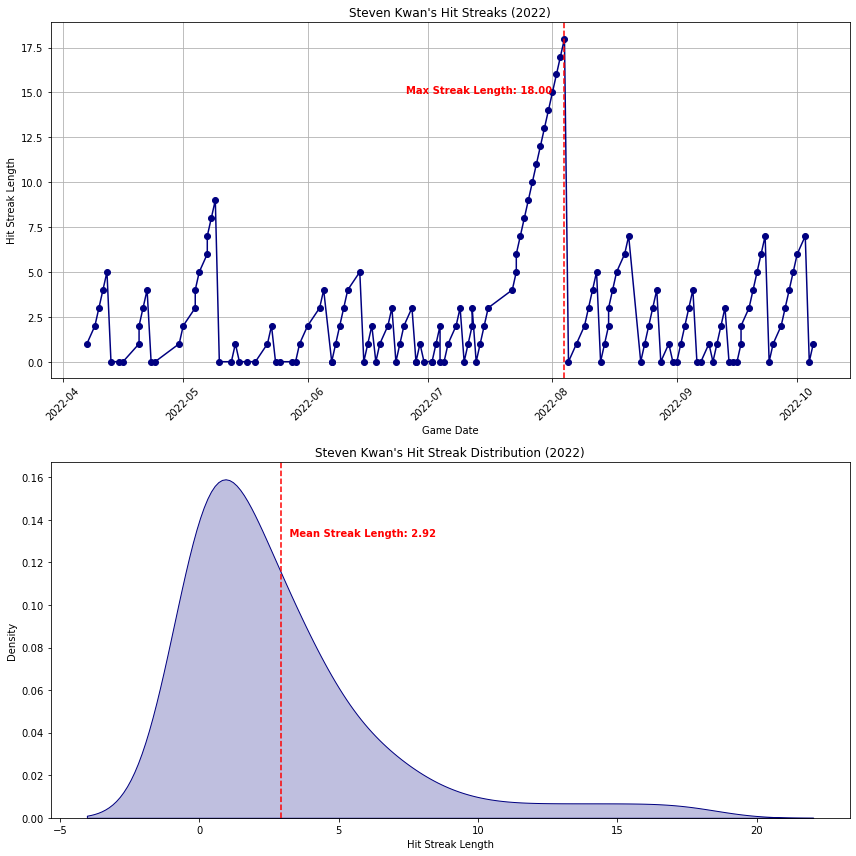

In [5]:
# Create Base for Subplots
fig, ax = plt.subplots(figsize = (12, 12))

# Add Axes and Individual Grids - Subplot Grids
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

# Visualize hitting streaks over the season
ax1.plot(games_with_hits22['game_date'], games_with_hits22['streak_length'], marker='o', color='navy')
ax1.set_title("Steven Kwan's Hit Streaks (2022)")
ax1.set_xlabel("Game Date")
ax1.set_ylabel("Hit Streak Length")
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
ax1.grid(True)
# Add max streak length as a vertical line & text
ax1.axvline(x=games_with_hits22.loc[games_with_hits22['streak_length'] == max_streak_length, 'game_date'].iloc[0], color='red', linestyle='--')
ax1.text(games_with_hits22['game_date'].iloc[len(games_with_hits22) // 2],  ax1.get_ylim()[1] * 0.8,  
         f'    Max Streak Length: {max_streak_length:.2f}', color='r', ha='center', va='center', fontweight='bold')

# Visualize hitting streak distribution
sns.kdeplot(games_with_hits22['streak_length'], fill=True, color='navy', ax=ax2)
ax2.set_title("Steven Kwan's Hit Streak Distribution (2022)")
ax2.set_xlabel("Hit Streak Length")
ax2.set_ylabel("Density")
# Add mean streak length as a vertical line & text
ax2.axvline(x=mean_streak_length, color='red', linestyle='--')
ax2.text(mean_streak_length, ax2.get_ylim()[1] * 0.8, 
         f'                                               Mean Streak Length: {mean_streak_length:.2f}', color='r', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [6]:
# Check to see number of games with hit & without
games_with_hits22['hit'].value_counts()

1    105
0     42
Name: hit, dtype: int64

In [7]:
# Calculate Kwan's probability of recording a hit in a game
prob_of_hit22 = (105/(105+42))
prob_of_hit22

0.7142857142857143

**2023 (718 PA | Max Hit Streak: 8.00 | Mean Hit Streak: 1.80 | Probability of Recording A Hit (In A Game):  68.15%)**

In [8]:
# Identify whether or not Kwan recorded a hit
hits = ["single", "double", "triple", "home_run"]
kwan2023['hit'] = kwan2023['events'].isin(hits).astype(int)

# Group by game_pk and game_date, identify Kwan's hits per game
games_with_hits23 = kwan2023.groupby(['game_pk', 'game_date'])['hit'].max().reset_index()
games_with_hits23['game_date'] = pd.to_datetime(games_with_hits23['game_date']) # Convert game_date into a date/time format
games_with_hits23 = games_with_hits23.sort_values(by='game_date').reset_index(drop=True)
games_with_hits23.head()

,game_pk,game_date,hit
0,718767,2023-03-30,0
1,718763,2023-03-31,1
2,718746,2023-04-01,1
3,718735,2023-04-02,1
4,718721,2023-04-03,1


In [9]:
# Initialize lists to hold streak lengths
streaks = []
current_streak = 0

# Calculate streaks and add them to the list for each game date
for hit in games_with_hits23['hit']:
    if hit == 1:
        current_streak += 1
    else:
        current_streak = 0
        
    streaks.append(current_streak)

# Add the streaks to 'game_with_hits' dataset
games_with_hits23['streak_length'] = streaks

# Calculate the mean & max streak length for visualization
mean_streak_length = np.mean(games_with_hits23['streak_length'])
max_streak_length = np.max(games_with_hits23['streak_length'])

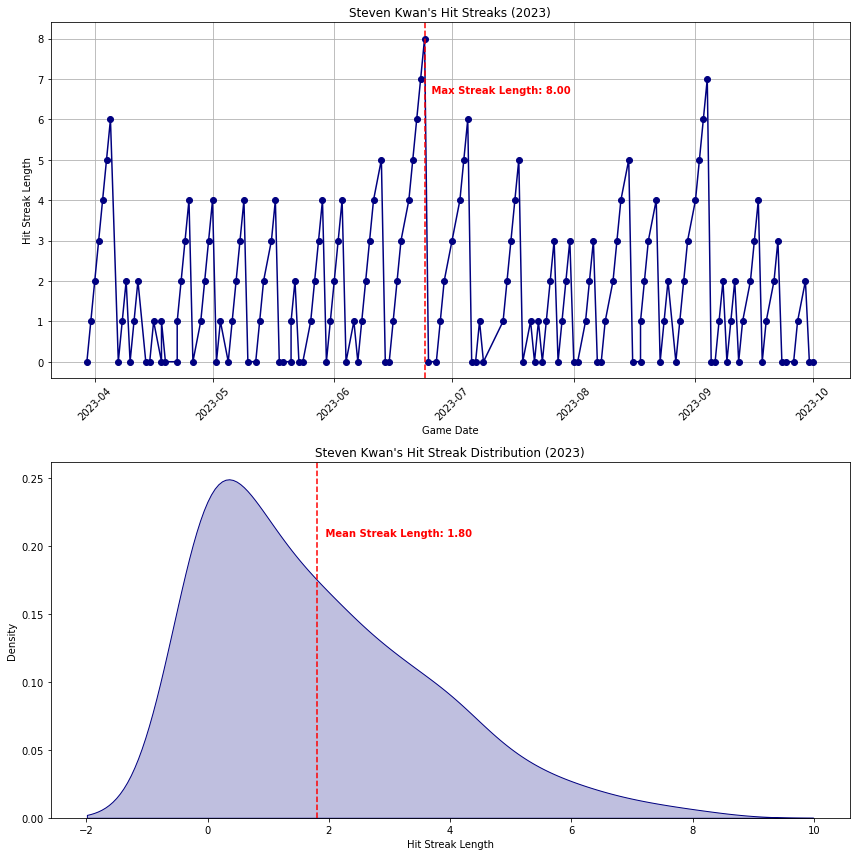

In [10]:
# Create Base for Subplots
fig, ax = plt.subplots(figsize = (12, 12))

# Add Axes & Grids
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

# Visualize hitting streaks over the season
ax1.plot(games_with_hits23['game_date'], games_with_hits23['streak_length'], marker='o', color='navy')
ax1.set_title("Steven Kwan's Hit Streaks (2023)")
ax1.set_xlabel("Game Date")
ax1.set_ylabel("Hit Streak Length")
ax1.tick_params(axis='x', rotation=45) 
ax1.grid(True)
# Add max streak length as a vertical line & text
ax1.axvline(x=games_with_hits23.loc[games_with_hits23['streak_length'] == max_streak_length, 'game_date'].iloc[0], color='red', linestyle='--')
ax1.text(games_with_hits23['game_date'].iloc[len(games_with_hits23) // 2],  ax1.get_ylim()[1] * 0.8,  
         f'                                   Max Streak Length: {max_streak_length:.2f}', color='r', ha='center', va='center', fontweight='bold')

# Visualize hitting streak distribution
sns.kdeplot(games_with_hits23['streak_length'], fill=True, color='navy', ax=ax2)
ax2.set_title("Steven Kwan's Hit Streak Distribution (2023)")
ax2.set_xlabel("Hit Streak Length")
ax2.set_ylabel("Density")
# Add mean streak length as a vertical line & text
ax2.axvline(x=mean_streak_length, color='red', linestyle='--')
ax2.text(mean_streak_length, ax2.get_ylim()[1] * 0.8, 
         f'                                               Mean Streak Length: {mean_streak_length:.2f}', color='r', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [11]:
# Check to see number of games with hit & without
games_with_hits23['hit'].value_counts()

1    107
0     50
Name: hit, dtype: int64

In [12]:
# Calculate Kwan's probability of recording a hit in a game during 2023
prob_of_hit23 = (107/(107+50))
prob_of_hit23

0.6815286624203821

**2024 (540 PA | Max Hit Streak: 14.00 | Mean Hit Streak: 2.36 | Probability of Getting A Hit (Per Game): 70.49% )**

In [13]:
# Identify whether or not Kwan recorded a hit
hits = ["single", "double", "triple", "home_run"]
kwan2024['hit'] = kwan2024['events'].isin(hits).astype(int)

# Group by game_pk and game_date, identify Kwan's hits per game
games_with_hits24 = kwan2024.groupby(['game_pk', 'game_date'])['hit'].max().reset_index()
games_with_hits24['game_date'] = pd.to_datetime(games_with_hits24['game_date']) # Convert game_date into a date/time format
games_with_hits24 = games_with_hits24.sort_values(by='game_date').reset_index(drop=True)
games_with_hits24.head()

,game_pk,game_date,hit
0,745687,2024-03-28,1
1,745682,2024-03-29,1
2,745684,2024-03-30,1
3,745683,2024-03-31,1
4,745277,2024-04-01,0


In [14]:
# Initialize lists to hold streak lengths
streaks = []
current_streak = 0

# Calculate streaks and add them to the list for each game date
for hit in games_with_hits24['hit']:
    if hit == 1:
        current_streak += 1
    else:
        current_streak = 0
        
    streaks.append(current_streak)

# Add the streaks to 'game_with_hits' dataset
games_with_hits24['streak_length'] = streaks

# Calculate the mean & max streak length for visualization
mean_streak_length = np.mean(games_with_hits24['streak_length'])
max_streak_length = np.max(games_with_hits24['streak_length'])

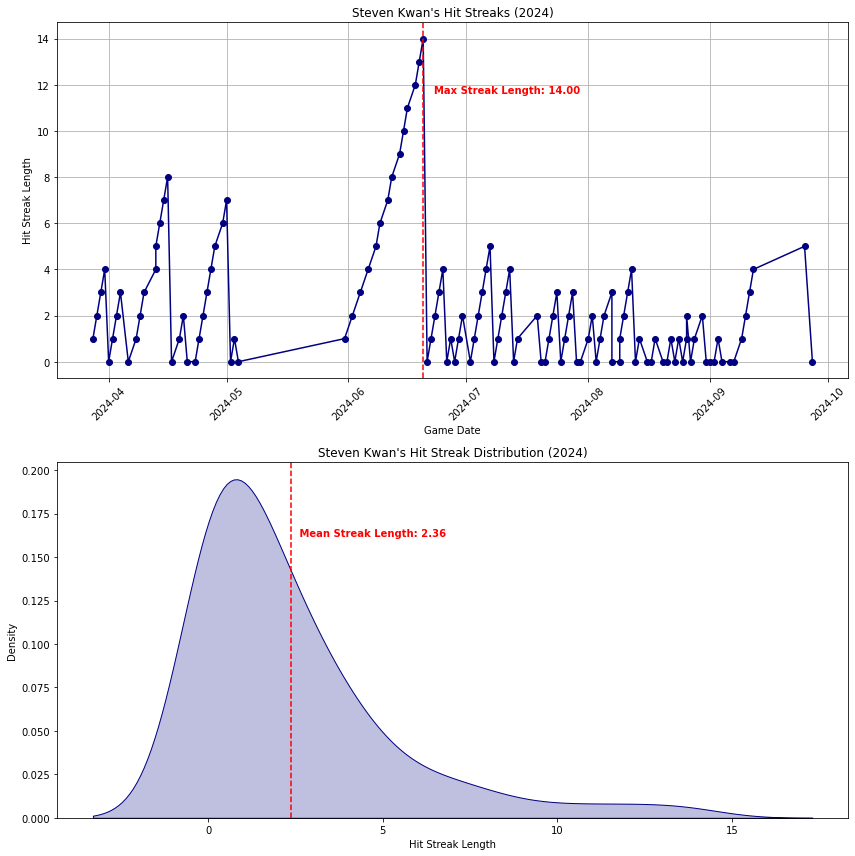

In [15]:
# Create Figure / Base for Subplots
fig, ax = plt.subplots(figsize = (12, 12))

# Add Axes and Individual Grids - Subplot Grids
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

# Visualize hitting streaks over the season
ax1.plot(games_with_hits24['game_date'], games_with_hits24['streak_length'], marker='o', color='navy')
ax1.set_title("Steven Kwan's Hit Streaks (2024)")
ax1.set_xlabel("Game Date")
ax1.set_ylabel("Hit Streak Length")
ax1.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
ax1.grid(True)
# Add max streak length as a vertical line & text
ax1.axvline(x=games_with_hits24.loc[games_with_hits24['streak_length'] == max_streak_length, 'game_date'].iloc[0], color='red', linestyle='--')
ax1.text(games_with_hits24['game_date'].iloc[len(games_with_hits24) // 2],  ax1.get_ylim()[1] * 0.8, 
         f'          Max Streak Length: {max_streak_length:.2f}', color='r',ha='center', va='center', fontweight='bold')

# Visualize hitting streak distribution
sns.kdeplot(games_with_hits24['streak_length'], fill=True, color='navy', ax=ax2)
ax2.set_title("Steven Kwan's Hit Streak Distribution (2024)")
ax2.set_xlabel("Hit Streak Length")
ax2.set_ylabel("Density")
# Add mean streak length as a vertical line & text
ax2.axvline(x=mean_streak_length, color='red', linestyle='--')
ax2.text(mean_streak_length, ax2.get_ylim()[1] * 0.8, 
         f'                                               Mean Streak Length: {mean_streak_length:.2f}', color='r', ha='center', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [16]:
# Check to see number of games with hit & without
games_with_hits24['hit'].value_counts()

1    86
0    36
Name: hit, dtype: int64

In [17]:
# Calculate probability of recording a hit 
prob_of_hit24 = (86/(86+36))
prob_of_hit24

0.7049180327868853

**Analysis of Kwan's Historical Performance:** Throughout his career, Kwan has yet to achieve a 20-game hit streak. He came very close in 2022 as he recorded a 18-game hit streak, but still fell a little short of the feat. Since then, he hasn't been able to match that same hit streak length as he only reached a maximum of 8 games in 2023, then rebounding in 2024 with a 14-game hit streak.

Given these results, we can note **Kwan's estimated probability should be close to 0**. Given that Kwan has yet to achieve the feat, it's difficult to imagine that Kwan would be projected to achieve a 20-game hit streak more than 5-30 instances of 1000 simulations. He certainly got close in 2022, but his results since then demonstrate just how difficult it is to repeat such high hitting streaks. 

Regardless, Kwan's historical hitting performance has been above-average in comparison to other hitters, especially from a contact-hitting perspective  (64th in wRC+ (117), 75th in wOBA (.333), 18th in AVG (.285), 12th in hits (479) in terms of hitting performance from 2022 - 2024). With this in mind, **I would still expect Kwan to have a higher probability than most players.**


**Calculate Prob Of Hit (2022 - 2024 Combined)**
Before I proceed into a bayesian analysis & monte-carlo simulation, I'll first need to calculate the probability he gets a hit in each game.

In [18]:
# Calculate Kwan's probability getting a hit in a game (2022 - 2024)

# 2022 --> 105 hits recorded in 147 games
# 2023 --> 107 hits recorded in 157 games
# 2024 --> 86 hits recorded in 122 games

prob_of_hit = ((105+107+86)/(147+157+122))
prob_of_hit

0.6995305164319249

Across Kwan's 407 games from 2022-2024, he recorded a hit in **~70.00%** of these games. As such, I'll be using this rate to support my support my predictive analysis sections.

**SUMMARY OF ANALYSIS:**

![Steven Kwan Hitting Streak](images/Steven%20Kwan%20Hit%20Streak.png)

## Traditional Monte-Carlo Simulation: Calculating Kwan's Probability Of A 20-Game Hit Streak (Estimate: 2.90% | Std. Dev = 0.1678)

For my first estimate, I'll build a monte-carlo simulation to calculate Kwan's likelihood of recorded a 20-game hit streak in the 2025 season. I'll forecast 1000 different 142-game seasons (the average number of games Kwan has played per season), taking the number of 20-hit streaks he ends up recording & dividing in by the number of simulations.  

The probability of a Kwan achieving a 20-game hitting streak is: 0.0290


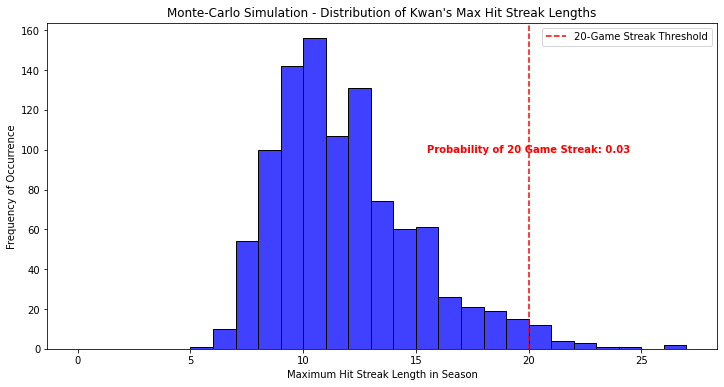

In [77]:
# Simulation Parameters
simulations = 1000
season_games = 142
hit_prob = 0.6995

# Track 20-game streak occurences
twenty_game_streak = [] # 

# MONTE CARLO SIMULATION 
for _ in range(simulations):
    streak = 0
    max_streak = 0
    for _ in range(season_games):
        # Does Kwan record a hit in this game?
        hit = np.random.binomial(1, hit_prob)
        
        # Update current streak
        if hit == 1:
            streak += 1
            max_streak = max(max_streak, streak) # Update max streak (if needed)
        else:
            streak = 0 # Reset streak if no hit was recorded

    
    # Add 1 if there was a 20-game hitting streak or greater
    if max_streak >= 20:
        twenty_game_streak.append(1)
    else:
        twenty_game_streak.append(0)

# Calculate probability of 20-game streak occuring
prob_of20 = sum(twenty_game_streak) / simulations
print(f"The probability of a Kwan achieving a 20-game hitting streak is: {prob_of20:.4f}")

# Plot the distribution of maximum streak lengths
plt.figure(figsize=(12, 6))
sns.histplot(max_streaks, bins=range(0, max(max_streaks) + 2), kde=False, color='blue', edgecolor='black')
plt.axvline(x=20, color='red', linestyle='--', label='20-Game Streak Threshold') # Plot Simulations, mark 20 game point in red
plt.title("Monte-Carlo Simulation - Distribution of Kwan's Max Hit Streak Lengths")
plt.xlabel("Maximum Hit Streak Length in Season")
plt.ylabel("Frequency of Occurrence")
plt.text(20, 100, f'Probability of 20 Game Streak: {prob_of20:.2f}', color='r', ha='center', va='center', fontweight='bold')

plt.legend()

plt.show()


**Analysis:** Based on the monte-carlo simulation, the probability that Steven Kwan will record a 20-hit game streak in 2025 is **2.90%**.

Acknowledging the rarity of 20-game hit streaks, the estimate doesn't come as too much of a suprise. However, it is a little bit odd to see Kwan's personal probability be assessed so low. I would expect it to be on the lower side, but 2.90% does seem a bit too low (especially when considering how close he had gotten to the streak in the past). This is where a bayesian analysis may prove useful. 

In [78]:
# Calculate Standard Deviation of maximum streak probabilities
std_dev = np.std(twenty_game_streak)
print(f"Standard Deviation of 20-game hit streak probabilities: {std_dev:.4f}")

Standard Deviation of 20-game hit streak probabilities: 0.1678


The Standard Deviation of the 20-game hit streak probabilities was **0.1678**. This implicates that the probability of a 20-game hit streak (across the simulations recorded) varied by ~16.78%.In comparison to the other estimate (which you'll see if the next section), this is quite high & indicates instability among the simulations (i.e., some simulations had a far greater probability recorded than others)

## Bayesian Monte Carlo: Calculating Kwan's Probability Of A 20-Game Hit Streak (Estimate: 0.2 | Std Dev: 0.0447)

To further support my analysis, I'll build a Bayesian Monte Carlo Simulation to retrieve another estimate. While this may seem redundant, I wanted to build this model for a couple of reasons:
1. To **validate & compare** the estimate provided by my monte-carlo simulation, ensuring the estimate is reasonable. 
2. A Bayesian Monte Carlo model may provide more **depth & accuracy** as it estimates with a measure of uncertainty. It also may provide some insight into the predictive power of Kwan's prior results


In [44]:
from scipy.stats import beta

Kwan's probability of achieving a 20-game hit streak: 0.0020


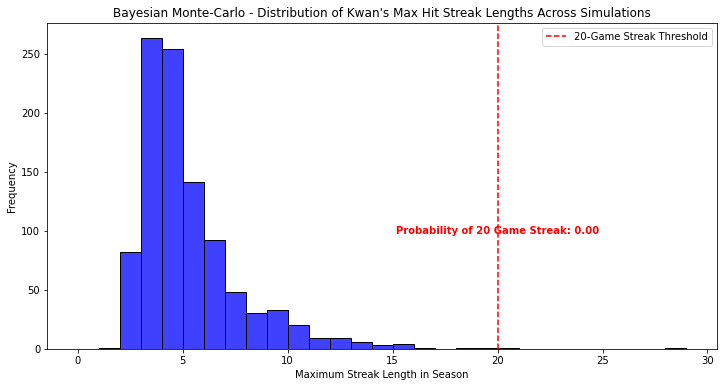

In [93]:
# Set data priors
alpha_prior = 298 # Games with hits 
beta_prior = 128 # Games without hits 

# Simulation parameters
simulations = 1000
season_games = 142 # Kwan's average games per season
twenty_game_streak = [] # List to track probability of 20-game streak
max_streaks = []  # List to store the max streak length from each simulation


# Build out monte carlo simulation
for _ in range(simulations):
    # Hit probability built using prior
    hit_prob = beta.rvs(alpha_prior, beta_prior)
    
    # Simulate season
    streak = 0
    max_streak = 0
    
    for _ in range(season_games):
        # Simulate whether Kwan records a hit in a game
        hit = np.random.binomial(1, hit_prob)
        
        # Update hit streak & max_streak (if applicable)
        if hit: 
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0 # Reset if no hit recorded
            
    # Record max length for simulation
    max_streaks.append(max_streak)
    
    # Check for 20-game streak, update if one is recorded
    if max_streak >= 20:
        twenty_game_streak.append(1)
        alpha_prior += 1 # Update because 20 game streak was recorded
    else:
        twenty_game_streak.append(0)
        beta_prior += 1 # Update because no 20 streak was recorded

# Record posterior paramaters after sim
posterior_alpha = alpha_prior
posterior_beta = beta_prior

# Calculate probability of 20-game streak occurence 
prob_of20 = sum(twenty_game_streak) / simulations
print(f"Kwan's probability of achieving a 20-game hit streak: {prob_of20:.4f}")


# Plot distribution of final results
plt.figure(figsize=(12, 6))
sns.histplot(max_streaks, bins=range(0, max(max_streaks) + 2), kde=False, color='blue', edgecolor='black')
plt.axvline(x=20, color='red', linestyle='--', label='20-Game Streak Threshold')
plt.title("Bayesian Monte-Carlo - Distribution of Kwan's Max Hit Streak Lengths Across Simulations")
plt.text(20, 100, f'Probability of 20 Game Streak: {prob_of20:.2f}', color='r', ha='center', va='center', fontweight='bold')
plt.xlabel("Maximum Streak Length in Season")
plt.ylabel("Frequency")
plt.legend()
plt.show()

**Analysis:**
Based on a bayesian monte-carlo simulation, there is a **0.2%** probability that Kwan will achieve a 20-game hit streak in a season.

This result is particulalrly intriguing due to the -1.80% difference between it and the traditional monte-carlo simulation. The difference suggest that prior data does not favour Kwan's ability to achieve a 20-game hit streak. Although Kwan's ability to consistently record hits is remarkable, the difficulty in achieving a 20-game hit streak in itself is a remarkable.

As mentioned earlier, there is no 'true probability' for this scenario, so no RMSE can be recorded. As such, I'll just focusing on calculating SD for now:

In [94]:
# Calculate standard deviation across all simulated results
SD_bayesianMC = np.std(twenty_game_streak)
print(f"Standard Deviation of Probabilities: {SD_bayesianMC:.4f}")

Standard Deviation of Probabilities: 0.0447


The standard deviation of 20-game hit streak possibilities was **0.0447** for the bayesian analysis. In comparison to the traditional monte-carlo simulation, this is deviation is far more stable (~4% deviation from simulation to simulation). This is likely due to the bayesian approach of updating the prior, helping to stabilize the results from simulation to simulation/

## Summary Of Results

![Kwan Probabilities](images/Kwan%20Probabilities.png)

## Concluding Thoughts & Analysis

In conclusion, there is a **0.2% - 2.90% likelihood that Steven Kwan will achieve a 20-game hit streak in 2025**. If I were to settle on a single value, I would assess Kwan's likelihood as **1.55%** (averaging the two estimates). Rather than picking one model over the other, I believe balancing the two is the superior option. I believe each model has its own strengths that are applicable to the scenario (i.e., relying on a fixed probability to represent Kwan's ability to get a hit (traditional monte-carlo sim) vs. adjusting probabilities based on simulation results (bayesian monte carlo sim). Thus, I believe it would be more preferable to balance the estimates of each model. 

With this estimate available, let's revisit the goals I created at the start of the analysis:

* **Goal 1**: *Calculate a *reasonable estimate* for Kwan's probabiltiy of achieving a 20-game hit streak in 2025. The estimate should be founded based on Kwan's historical performances*?
    * I calculated a **1.55%** probability. This estimate is reasonable as it aligns with prior intuition (i.e., a 20-game hit streak is an incredibily rare feat), and leverages the estimates outputted by advanced analytical methods (i.e., monte-carlo simulation, bayesian monte carlo)



* **Goal 2**: *Measure Kwan's likelihood of a 20-game hit streak against the rest of the field (to some degree, at least). How does Kwan measure up?*
    * As identified earlier in the analysis, ~2.40% of qualified hitters end up reaching a 20-game hit streak (3 of ~130 qualified hitters). However, this benchmark doesn't consider for individual player performance & other external variables. To get to that 'qualified' status, this assumes the player won't injured for a somewhat long duration of time. It's also important to consider for individual player performance, which **effectively places most of the candidates at a probability close to 0** (in combination with the external variables). 
    * With this in mind, its evident that **Kwan's 1.55% rate *likely* ranks above a majority of qualified players. I would personally place him in the top 25% in this respect**.
    * If given more time, I would assess other qualified players (potentially players who've achieved this feat in the past) & attempt to measure Kwan against them 
 
 
* **Goal 3**: *Is there any sort of managerial or player evaluation insight we can derive from this analysis?*
    * Given the nature of this analysis, there isn't much to derive in terms of player evaluation or managerial insights. However, we can at least acknowledge the rarity of 20-game hit streaks and how much of anamoly they are. Even an above-average, contact-oriented hitter such as Kwan has just a 0.2% - 2.90% probability of achieving such a feat, demonstrating its exclusivity. As such **we should be appreciative of whenever these streaks occur, acknowledging how much of a difficult feat it is for a player to achieve**. It's performance implications would require an entirely different analysis, but nevertheless we can all recognize the difficulty in achieving a 20-game hit streak.
    * Based on the historical data we derived earlier, I'd expect Kwan to achieve a 20-game hit streak (if he were ever to accomplish it) during **June to July** of the season

